In [1]:
# Importing all the libraries which will be in use.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing training data using Pandas.
train_data = pd.read_csv('Train.csv')

In [3]:
print(train_data.columns)

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')


In [4]:
# Top 5 rows of our training dataset
train_data.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [5]:
# Data types of all the columns in training dataset
train_data.dtypes

EmpID                        int64
EmpName                     object
LanguageOfCommunication     object
Age                          int64
Gender                      object
JobProfileIDApplyingFor     object
HighestDegree               object
DegreeBranch                object
GraduatingInstitute         object
LatestDegreeCGPA             int64
YearsOfExperince             int64
GraduationYear               int64
CurrentCTC                   int64
ExpectedCTC                  int64
MartialStatus               object
EmpScore                     int64
CurrentDesignation          object
CurrentCompanyType          object
DepartmentInCompany         object
TotalLeavesTaken             int64
BiasInfluentialFactor       object
FitmentPercent             float64
dtype: object

In [6]:
# Names of all the columns in training dataset
train_data.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [7]:
train_data['BiasInfluentialFactor']

0          YearsOfExperince
1                       NaN
2                    Gender
3                    Gender
4              DegreeBranch
                ...        
13640                Gender
13641                   NaN
13642    CurrentCompanyType
13643              EmpScore
13644      YearsOfExperince
Name: BiasInfluentialFactor, Length: 13645, dtype: object

In [8]:
# Dropping the columns which are of no use and cause biasness.
train_data.drop(['EmpID', 'EmpName', 'Gender','GraduationYear','MartialStatus'], inplace=True, axis=1)

In [9]:
# Checking number of columns.
len(train_data.columns)

17

In [10]:
train_data.isnull().sum()

LanguageOfCommunication       0
Age                           0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
CurrentCTC                    0
ExpectedCTC                   0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [11]:
train_data['BiasInfluentialFactor'].value_counts()

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='Age'>

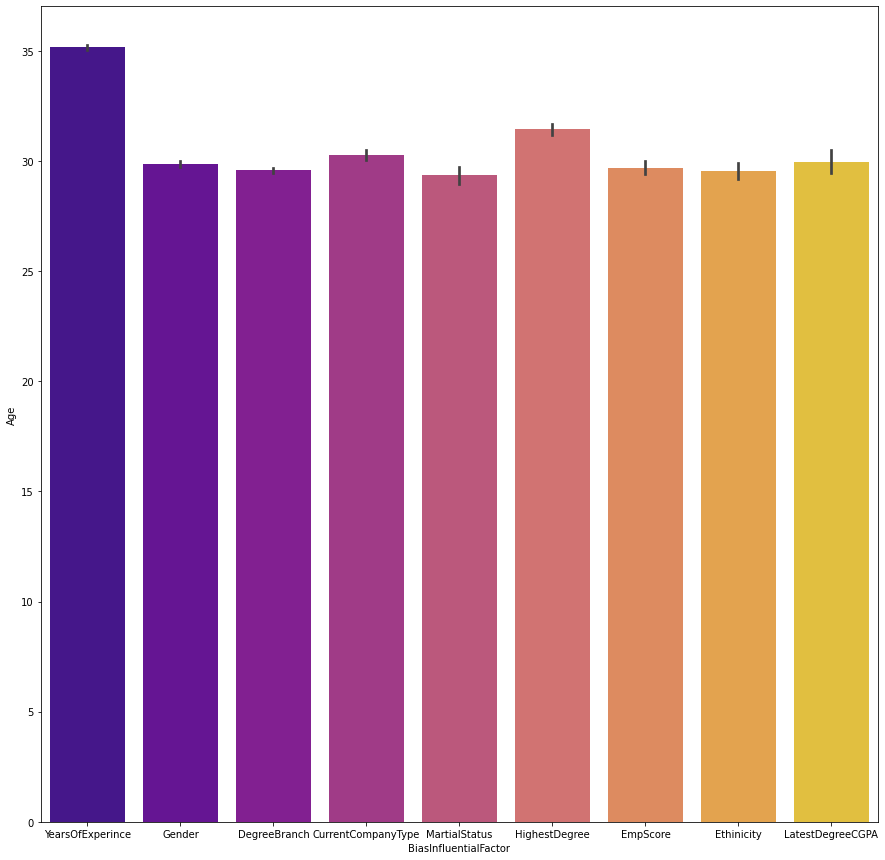

In [12]:
plt.figure(figsize=(15,15))
sns.barplot(x ='BiasInfluentialFactor', y ='Age' ,data = train_data, palette ='plasma')

In [13]:
train_data['Age'].value_counts()

32    1207
34    1157
29    1140
33    1140
35    1122
31    1112
28    1105
27    1100
30    1060
26     744
25     733
24     721
37     375
38     365
36     353
41      62
40      56
39      52
42      41
Name: Age, dtype: int64

In [14]:
def impute(cols):
    BiasInfluentialFactor = cols[0]
    Age = cols[1]
    
    if pd.isnull(BiasInfluentialFactor):
        
        if Age >=35:
            return 'YearsOfExperince'
        elif 35>Age>=30:
            return 'CurrentCompanyType'
        elif 30 >Age>=28:
            return 'Gender'
        else:
            return 'DegreeBranch'
    else:
        return BiasInfluentialFactor

In [15]:
train_data['BiasInfluentialFactor'] = train_data[['BiasInfluentialFactor', 'Age']].apply(impute, axis =1)

In [16]:
train_data['BiasInfluentialFactor'].value_counts()

DegreeBranch          3657
Gender                3162
CurrentCompanyType    2562
YearsOfExperince      2153
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

In [17]:
# Again checking the total null values.
train_data.isnull().sum()

LanguageOfCommunication    0
Age                        0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
CurrentCTC                 0
ExpectedCTC                0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
BiasInfluentialFactor      0
FitmentPercent             0
dtype: int64

In [18]:
# checking top 5 rows
train_data.head()

,LanguageOfCommunication,Age,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,35,JR85289,B.Tech,Electrical,Tier 1,7,12,21,26,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,English,26,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,15,19,5,BA,MidSized,Engineering,6,DegreeBranch,67.09
2,English,36,JR87525,PhD,Computer Science,Tier 1,6,6,15,24,5,SDE,MidSized,Engineering,19,Gender,91.26
3,English,29,JR87525,BCA,Information Technology,Tier 2,5,6,16,24,5,SDE,Startup,Product,16,Gender,72.29
4,English,25,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,24,32,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [19]:
# All columns name in training dataset
train_data.columns

Index(['LanguageOfCommunication', 'Age', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'CurrentCTC', 'ExpectedCTC',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [20]:
# Making a LabelEncoder class instance 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [21]:
# Applying labelencoder on 'GraduatingInstitute'column
train_data['GraduatingInstitute'] = labelencoder.fit_transform(train_data['GraduatingInstitute'])
train_data.head()

,LanguageOfCommunication,Age,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,35,JR85289,B.Tech,Electrical,0,7,12,21,26,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,English,26,JR87525,B.Tech,Artificial Intelligence,2,7,3,15,19,5,BA,MidSized,Engineering,6,DegreeBranch,67.09
2,English,36,JR87525,PhD,Computer Science,0,6,6,15,24,5,SDE,MidSized,Engineering,19,Gender,91.26
3,English,29,JR87525,BCA,Information Technology,1,5,6,16,24,5,SDE,Startup,Product,16,Gender,72.29
4,English,25,JR70175,Dual M.Tech,Computer Science,2,8,2,24,32,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [22]:
# Using pandas dummies method, converting all categorical data into numeric data.
train_categorical = pd.get_dummies(train_data)

In [23]:
# Checking head 
train_categorical.head()

,Age,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_English,...,DepartmentInCompany_Product,BiasInfluentialFactor_CurrentCompanyType,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,35,0,7,12,21,26,5,20,95.40,1,...,0,0,0,0,0,0,0,0,0,1
1,26,2,7,3,15,19,5,6,67.09,1,...,0,0,1,0,0,0,0,0,0,0
2,36,0,6,6,15,24,5,19,91.26,1,...,0,0,0,0,0,1,0,0,0,0
3,29,1,5,6,16,24,5,16,72.29,1,...,1,0,0,0,0,1,0,0,0,0
4,25,2,8,2,24,32,5,10,86.34,1,...,0,0,1,0,0,0,0,0,0,0


In [24]:
# Applying Normalisation to the columns whose values are not binary.
cols_to_scale = ['Age','GraduatingInstitute','LatestDegreeCGPA','YearsOfExperince', 'CurrentCTC', 'ExpectedCTC','EmpScore', 'TotalLeavesTaken' ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_categorical[cols_to_scale] = scaler.fit_transform(train_categorical[cols_to_scale])

In [25]:
#Assigning X_train
X_train = train_categorical.drop('FitmentPercent', axis=1).values

In [26]:
#Assigning y_train
y_train = train_categorical['FitmentPercent'].values

In [27]:
X_train[8]

array([0.22222222, 0.        , 0.33333333, 0.09090909, 0.625     ,
       0.6       , 0.75      , 0.1875    , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        ])

### Making an ANN Model


In [28]:
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
keras.layers.Dropout(0.5)
model.add(tf.keras.layers.Dense(units=30, activation='relu'))
keras.layers.Dropout(0.5)
model.add(tf.keras.layers.Dense(units=15, activation='relu'))
keras.layers.Dropout(0.5)
model.add(tf.keras.layers.Dense(units=1))

In [30]:
# Compiling the ANN model
model.compile(optimizer='adam', loss='huber_loss')

In [31]:
# Fitting the model with X_train and y_train
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
427/427 [==============================] - 1s 3ms/step - loss: 22.7839
Epoch 2/100
427/427 [==============================] - 1s 2ms/step - loss: 9.0318
Epoch 3/100
427/427 [==============================] - 1s 2ms/step - loss: 8.9628
Epoch 4/100
427/427 [==============================] - 1s 2ms/step - loss: 8.9197
Epoch 5/100
427/427 [==============================] - 1s 2ms/step - loss: 8.8926
Epoch 6/100
427/427 [==============================] - 1s 2ms/step - loss: 8.8287
Epoch 7/100
427/427 [==============================] - 1s 2ms/step - loss: 8.7270
Epoch 8/100
427/427 [==============================] - 1s 2ms/step - loss: 8.6104
Epoch 9/100
427/427 [==============================] - 1s 1ms/step - loss: 8.4679
Epoch 10/100
427/427 [==============================] - 1s 1ms/step - loss: 8.3726
Epoch 11/100
427/427 [==============================] - 1s 1ms/step - loss: 8.2786
Epoch 12/100
427/427 [==============================] - 1s 1ms/step - loss: 8.2369
Epoch 13/100

427/427 [==============================] - ETA: 0s - loss: 7.370 - 1s 2ms/step - loss: 7.3471
Epoch 100/100
427/427 [==============================] - 1s 2ms/step - loss: 7.3498


Now we will work on our test dataset.

In [32]:
test_data = pd.read_csv('Test.csv')

In [33]:
test_data.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken'],
      dtype='object')

In [34]:
test_data.drop(['EmpID', 'EmpName', 'Gender','GraduationYear','MartialStatus'], inplace=True, axis=1)

In [35]:
test_data.shape

(8745, 15)

In [36]:
NaN = np.nan
test_data["BiasInfluentialFactor"] = NaN

In [37]:
test_data.isnull().sum()

LanguageOfCommunication       0
Age                           0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
CurrentCTC                    0
ExpectedCTC                   0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      8745
dtype: int64

In [38]:
test_data['BiasInfluentialFactor'] = train_data[['BiasInfluentialFactor', 'Age']].apply(impute, axis =1)

In [39]:
test_data['BiasInfluentialFactor']

0         YearsOfExperince
1             DegreeBranch
2                   Gender
3                   Gender
4             DegreeBranch
               ...        
8740          DegreeBranch
8741                Gender
8742      YearsOfExperince
8743    CurrentCompanyType
8744      YearsOfExperince
Name: BiasInfluentialFactor, Length: 8745, dtype: object

In [40]:
test_data.isnull().sum()

LanguageOfCommunication    0
Age                        0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
CurrentCTC                 0
ExpectedCTC                0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
BiasInfluentialFactor      0
dtype: int64

In [41]:
test_data.head()

,LanguageOfCommunication,Age,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,Native,35,JR85289,PhD,Information Technology,Tier 2,5,5,27,34,4,SDE,Enterprise,Finance,18,YearsOfExperince
1,English,35,JR85289,B.Tech,Information Technology,Tier 3,9,12,29,33,4,EM,Enterprise,Engineering,8,DegreeBranch
2,English,28,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,18,25,3,SDE,Startup,Engineering,18,Gender
3,Hindi,37,JR87525,MS,Computer Science,Tier 2,8,11,7,12,5,DS,Enterprise,Product,17,Gender
4,Hindi,36,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,22,32,4,SDE,Startup,Engineering,9,DegreeBranch


In [42]:
test_data.columns

Index(['LanguageOfCommunication', 'Age', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'CurrentCTC', 'ExpectedCTC',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor'],
      dtype='object')

In [43]:
test_data['GraduatingInstitute'] = labelencoder.fit_transform(test_data['GraduatingInstitute'])
test_data.head()

,LanguageOfCommunication,Age,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,Native,35,JR85289,PhD,Information Technology,1,5,5,27,34,4,SDE,Enterprise,Finance,18,YearsOfExperince
1,English,35,JR85289,B.Tech,Information Technology,2,9,12,29,33,4,EM,Enterprise,Engineering,8,DegreeBranch
2,English,28,JR87525,M.Tech,Artificial Intelligence,1,9,2,18,25,3,SDE,Startup,Engineering,18,Gender
3,Hindi,37,JR87525,MS,Computer Science,1,8,11,7,12,5,DS,Enterprise,Product,17,Gender
4,Hindi,36,JR85289,PhD,Artificial Intelligence,1,7,6,22,32,4,SDE,Startup,Engineering,9,DegreeBranch


In [44]:
test_categorical = pd.get_dummies(test_data)

In [45]:
test_categorical.head()

,Age,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,...,DepartmentInCompany_Product,BiasInfluentialFactor_CurrentCompanyType,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,35,1,5,5,27,34,4,18,0,0,...,0,0,0,0,0,0,0,0,0,1
1,35,2,9,12,29,33,4,8,1,0,...,0,0,1,0,0,0,0,0,0,0
2,28,1,9,2,18,25,3,18,1,0,...,0,0,0,0,0,1,0,0,0,0
3,37,1,8,11,7,12,5,17,0,1,...,1,0,0,0,0,1,0,0,0,0
4,36,1,7,6,22,32,4,9,0,1,...,0,0,1,0,0,0,0,0,0,0


In [46]:
cols_to_scale = ['Age','GraduatingInstitute','LatestDegreeCGPA','YearsOfExperince', 'CurrentCTC', 'ExpectedCTC','EmpScore', 'TotalLeavesTaken' ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_categorical[cols_to_scale] = scaler.fit_transform(test_categorical[cols_to_scale])

In [47]:
test_categorical.head()

,Age,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,...,DepartmentInCompany_Product,BiasInfluentialFactor_CurrentCompanyType,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,0.611111,0.5,0.166667,0.363636,0.875000,0.800000,0.75,0.8750,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.611111,1.0,0.833333,1.000000,0.958333,0.766667,0.75,0.2500,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0.222222,0.5,0.833333,0.090909,0.500000,0.500000,0.50,0.8750,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.722222,0.5,0.666667,0.909091,0.041667,0.066667,1.00,0.8125,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0.666667,0.5,0.500000,0.454545,0.666667,0.733333,0.75,0.3125,0,1,...,0,0,1,0,0,0,0,0,0,0


In [48]:
X_test = test_categorical.values

In [49]:
X_test

array([[0.61111111, 0.5       , 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       [0.61111111, 1.        , 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.5       , 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 0.5       , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.5       , 0.83333333, ..., 0.        , 0.        ,
        1.        ]])

In [50]:
test_data['LanguageOfCommunication'].value_counts()

English    4771
Hindi      3088
Native      886
Name: LanguageOfCommunication, dtype: int64

Saving our ANN model 

In [51]:
model.save('saving_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saving_model.model\assets


In [52]:
new_model = tf.keras.models.load_model('saving_model.model')

In [53]:
# Prediction of test dataset
predictions = new_model.predict(X_test)

In [54]:
bf = test_data['BiasInfluentialFactor'].values

In [55]:
type(bf)

numpy.ndarray

In [56]:
test_data.shape

(8745, 16)

In [57]:
predictions

array([[62.77041],
       [92.14136],
       [78.94503],
       ...,
       [84.0592 ],
       [68.84348],
       [80.83032]], dtype=float32)

In [58]:
df = pd.read_csv('test.csv')

In [59]:
emp = df['EmpID'].values

## Making a CSV file of our Prediction for the Submission of  the task


In [60]:
Dataframe = pd.DataFrame(predictions, columns=['FitmentPercent'])

In [61]:
Dataframe

,FitmentPercent
0,62.770409
1,92.141357
2,78.945030
3,82.936569
4,87.506088
...,...
8740,94.931465
8741,78.410904
8742,84.059196
8743,68.843483


In [62]:
Dataframe['BiasInfluentialFactor'] = bf

In [63]:
Dataframe

,FitmentPercent,BiasInfluentialFactor
0,62.770409,YearsOfExperince
1,92.141357,DegreeBranch
2,78.945030,Gender
3,82.936569,Gender
4,87.506088,DegreeBranch
...,...,...
8740,94.931465,DegreeBranch
8741,78.410904,Gender
8742,84.059196,YearsOfExperince
8743,68.843483,CurrentCompanyType


In [64]:
Dataframe['EmpID'] = emp

In [65]:
Dataframe.to_csv (r'C:\Users\The ChainSmokers\amazon intern data\predictions.csv', index = False, header=True)

In [66]:
Dataframe

,FitmentPercent,BiasInfluentialFactor,EmpID
0,62.770409,YearsOfExperince,5664
1,92.141357,DegreeBranch,23568
2,78.945030,Gender,21490
3,82.936569,Gender,8363
4,87.506088,DegreeBranch,6165
...,...,...,...
8740,94.931465,DegreeBranch,14758
8741,78.410904,Gender,23544
8742,84.059196,YearsOfExperince,16175
8743,68.843483,CurrentCompanyType,18458
